### FLIGHT PRICE PREDICTION Scrapping


#### Problem Statement:
Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest available ticket on a given flight gets more and less expensive over time. This usually happens as an attempt to maximize revenue based on -

1. Time of purchase patterns (making sure last-minute purchases are expensive)

2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales            and hold back inventory for those expensive last-minute expensive purchases)

So, you have to work on a project where you collect data of flight fares with other features and work to make a model to predict fares of flights.

1. Data Collection:
Scrapped 1501 rows of data from website: Yatra.com 
The number of columns are:

Features:
 * Airline 
 * Date of Journey,
 * Source,
 * Destination,
 * Departure Time,
 * Arrival Time,
 * Duration,
 * Total Stops and Price

2. Data Analysis:
 * After cleaning the data, you have to do some analysis on the data.
 * Do airfares change frequently?
 * Do they move in small increments or in large jumps?
 * Do they tend to go up or down over time?
 * What is the best time to buy so that the consumer can save the most by taking the least risk?
 * Does price increase as we get near to departure date?
 * Is Indigo cheaper than Jet Airways?
 * Are morning flights expensive?

3. Model Building:
After collecting the data, you need to build a machine learning model. Before model building do all data pre-processing steps. Try different models with different hyper parameters and select the bestmodel. Follow the complete life cycle of data science. Include all the steps like:

 * Data Cleaning
 * Exploratory Data Analysis
 * Data Pre-processing
 * Model Building
 * Model Evaluation
 * Selecting the best model

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from scipy.stats import zscore
from sklearn.preprocessing  import power_transform, StandardScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, auc, roc_auc_score, plot_roc_curve, r2_score, classification_report, mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

import pickle

In [154]:
flight=pd.read_csv("flight.csv")

In [155]:
pd.set_option("display.max_columns",None)

In [156]:
flight.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,Go First,24/9/2022,Bangalore,New Delhi,20:35,8:05,2h 05m,Non Stop,"5,950"
1,Go First,21/9/2022,Kolkata,Bangalore,22:00,10:10,2h 10m,Non Stop,"5,950"
2,Go First,16/9/2022,Delhi,Mumbai,23:05,15:10,2h 05m,Non Stop,"5,950"
3,Go First,24/9/2022,Mumbai,Rajasthan,23:55,16:40,2h 10m,Non Stop,"5,950"
4,SpiceJet,24/9/2022,Bangalore,Chennai,1:00,9:35,2h 05m,Non Stop,"5,950"


In [157]:
flight.shape

(1500, 9)

In [158]:
flight.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time',
       'Arrival_Time', 'Duration', 'Total_Stops', 'Price'],
      dtype='object')

### Checking Data Type of all data

In [159]:
flight.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Price              object
dtype: object

In [160]:
flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

### Checking for Null Values through Heatmap

<AxesSubplot:>

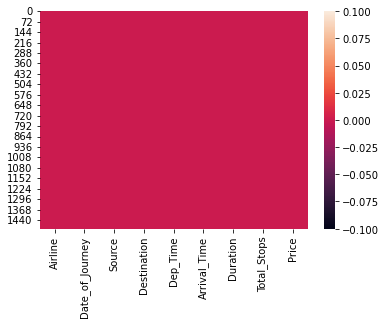

In [161]:
sns.heatmap(flight.isnull())

In [162]:
(flight=='-').sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

### Checking total number of unique value in each column of Dataset

In [163]:
flight.nunique()

Airline             6
Date_of_Journey     5
Source              4
Destination         5
Dep_Time           55
Arrival_Time       30
Duration           19
Total_Stops         1
Price              55
dtype: int64

In [164]:
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          1500 non-null   object
 1   Date_of_Journey  1500 non-null   object
 2   Source           1500 non-null   object
 3   Destination      1500 non-null   object
 4   Dep_Time         1500 non-null   object
 5   Arrival_Time     1500 non-null   object
 6   Duration         1500 non-null   object
 7   Total_Stops      1500 non-null   object
 8   Price            1500 non-null   object
dtypes: object(9)
memory usage: 105.6+ KB


In [165]:
#checking all values of column 'Date_of_Journey'
flight['Date_of_Journey'].value_counts()

24/9/2022    1470
21/9/2022      10
16/9/2022      10
4/9/2022        5
2/9/2022        5
Name: Date_of_Journey, dtype: int64

In [166]:
#droping rows containing values "-"
flight.drop(flight.loc[flight['Date_of_Journey'] == "-"].index, inplace=True)

In [167]:
#Checking again "-" values in column 'Date_of_Journey' after droping
(flight=='-').sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

In [168]:
#Checking again "Null" values in dataset
flight.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

### Extracting "Day", "Date" and "Month" from Column 'Date_of_Journey'


In [169]:
#converting into list for extraction
Journey_Date= flight['Date_of_Journey'].tolist()

In [170]:
#creating empty list
Day= []
date = []
Month = []
Date = []

In [171]:
#fetching data from 'date'
for i in date:
    Date.append(i.split(" ")[2])
    Month.append(i.split(" ")[1])

In [172]:
#droping column 'Date_of_Journey' as it is not required now. We have extracted data from it
flight.drop(columns=['Date_of_Journey'], inplace= True)

In [173]:
#checking dataset again
flight.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,Go First,Bangalore,New Delhi,20:35,8:05,2h 05m,Non Stop,"5,950"
1,Go First,Kolkata,Bangalore,22:00,10:10,2h 10m,Non Stop,"5,950"
2,Go First,Delhi,Mumbai,23:05,15:10,2h 05m,Non Stop,"5,950"
3,Go First,Mumbai,Rajasthan,23:55,16:40,2h 10m,Non Stop,"5,950"
4,SpiceJet,Bangalore,Chennai,1:00,9:35,2h 05m,Non Stop,"5,950"


In [174]:
#Driven_KiloMeters column:
flight["Arrival_Time"]= flight["Arrival_Time"].str.replace('\n', '')
flight["Arrival_Time"]= flight["Arrival_Time"].str.replace('+', '')
flight["Arrival_Time"]= flight["Arrival_Time"].str.replace(' ', '')
flight["Arrival_Time"]= flight["Arrival_Time"].str.replace('1', '')
flight["Arrival_Time"]= flight["Arrival_Time"].str.replace('day', '')

In [175]:
flight['Arrival_Time'] = flight['Arrival_Time'].replace({':20':'0:20','8:5':'8:50','2:5':'2:50','7:5':'7:50','Dec 05':'Sun, Dec 5','Dec 06':'Mon, Dec 6','Dec 07':'Tue, Dec 7'})


In [176]:
flight['Arrival_Time'] = flight['Arrival_Time'].replace({':20':'0:20','8:5':'08:50','2:5':'02:50','7:5':'07:50',':25':'00:25','0:0':'00:00','04:5':'04:50',
                                                        '07:0':'07:00','2:0':'02:00','2:5':'02:50','07:5':'07:50',':55':'00:55','08:0':'08:00','08:5':'08:50',
                                                         ':0':'00:00','4:0':'04:00','3:0':'03:00','8:0':'08:00','0:5':'00:50',':50':'00:50','00:5':'00:50','22:5':'22:50',
                                                         '5:0':'05:00','00:0':'00:00','23:0':'23:00','09:0':'09:00',':45':'00:45','5:00':'05:00','4:00':'04:00','9:05':'09:05',
                                                         '8:20':'08:20','2:45':'02:45', '7:05':'07:05', '2:20':'02:20', '5:20':'05:20',':05':'00:05', '9:20':'09:20',
                                                        '8:45':'08:45','7:55':'07:55','6:5':'06:50','09:5':'09:50','3:35':'03:35','3:40':'03:40','06:5':'06:50',':40':'00:40',
                                                         '8:55':'08:55','3:30':'03:30', '6:00':'06:00', '4:30':'04:30', '0:50':'00:50','9:55':'09:55', '23:5':'23:50', 
                                                        '2:40':'02:40', '0:20':'00:20', '4:45':'0:45', '2:05':'02:05', '2:25':'02:25', '0:55':'00:55', '2:50':'02:50', '8:25':'08:25', 
                                                         '20:5':'20:50', '9:45':'09:45', '5:50':'05:50', '7:45':'07:45', '0:40':'00:40', '0:30':'00:30', '5:40':'05:40', '22:0':'22:00', 
                                                         '6:55':'06:55', '8:05':'08:05', '7:25':'07:25', '9:35':'09:35', '0:35':'00:35', '6:30':'06:30', '3:20':'03:20', '3:55':'03:55',
                                                        '03:5':'03:50', '6:40':'06:40', '9:40':'09:40', '3:00':'03:00', ':00':'00:00', '5:45':'05:45', '6:35':'06:35', '5:5':'05:50', 
                                                         '3:50':'03:50', '02:0':'02:00', '7:0':'07:00', '5:30':'05:30', '06:0':'06:00', '8:50':'08:50', '8:40':'08:40', '7:20':'07:20', 
                                                         '6:05':'06:05', '9:0':'09:00', '6:45':'06:45', '04:0':'04:00', '20:0':'20:00', '05:5':'05:50', '9:5':'09:50', '3:5':'03:50' })


In [177]:
flight.drop(["Arrival_Time"], axis = 1, inplace = True)


In [178]:
#checking dataset again
flight.head()

,Airline,Source,Destination,Dep_Time,Duration,Total_Stops,Price
0,Go First,Bangalore,New Delhi,20:35,2h 05m,Non Stop,"5,950"
1,Go First,Kolkata,Bangalore,22:00,2h 10m,Non Stop,"5,950"
2,Go First,Delhi,Mumbai,23:05,2h 05m,Non Stop,"5,950"
3,Go First,Mumbai,Rajasthan,23:55,2h 10m,Non Stop,"5,950"
4,SpiceJet,Bangalore,Chennai,1:00,2h 05m,Non Stop,"5,950"


In [179]:
flight["Duration"].unique()

array(['2h 05m', '2h 10m', '2h 15m', '2h 25m', '2h 20m', '2h 35m',
       '5h 05m', '8h 55m', '12h 05m', '12h 20m', '15h 30m', '16h 45m',
       '23h 45m', '2h 00m', '5h 10m', '13h 50m', '6h 35m', '9h 15m',
       '5h 30m'], dtype=object)

In [180]:
flight["Duration"]= flight["Duration"].str.replace(' h', 'h')
flight["Duration"]= flight["Duration"].str.replace(' m', 'm')

In [181]:
flight["Duration"].unique()

array(['2h 05m', '2h 10m', '2h 15m', '2h 25m', '2h 20m', '2h 35m',
       '5h 05m', '8h 55m', '12h 05m', '12h 20m', '15h 30m', '16h 45m',
       '23h 45m', '2h 00m', '5h 10m', '13h 50m', '6h 35m', '9h 15m',
       '5h 30m'], dtype=object)

In [182]:
# Time taken by plane to reach destination is called Duration (Duration= Departure Time - Arrival time).
duration = list(flight["Duration"])

for i in range(len(duration)):
    # Checking if duration contains only hour or minutes
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            # Adding 0 Minutes
            duration[i] = duration[i].strip() + " 0m"   
        else:
            # Adding 0 Hours
            duration[i] = "0h " + duration[i]

In [183]:
Duration_Hours = []
for i in range(len(duration)):
    # Extracting hours from duration
    Duration_Hours.append(int(duration[i].split(sep = "h")[0]))    

In [184]:
Duration_Minutes = []
for i in range(len(duration)):
    # Extracting minutes from duration
    Duration_Minutes.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [185]:
# Adding Duration_Hours and Duration_Minutes list to flight_train Dataset
flight["Duration_Hours"] = Duration_Hours
flight["Duration_Minutes"] = Duration_Minutes

In [186]:
flight.drop(["Duration"], axis = 1, inplace = True)

In [187]:
flight.head()

,Airline,Source,Destination,Dep_Time,Total_Stops,Price,Duration_Hours,Duration_Minutes
0,Go First,Bangalore,New Delhi,20:35,Non Stop,"5,950",2,5
1,Go First,Kolkata,Bangalore,22:00,Non Stop,"5,950",2,10
2,Go First,Delhi,Mumbai,23:05,Non Stop,"5,950",2,5
3,Go First,Mumbai,Rajasthan,23:55,Non Stop,"5,950",2,10
4,SpiceJet,Bangalore,Chennai,1:00,Non Stop,"5,950",2,5


In [188]:
flight['Price'].unique()

array(['5,950', '5,954', '5,955', '6,092', '6,165', '6,827', '7,698',
       '7,835', '7,897', '8,579', '8,580', '8,652', '8,936', '8,947',
       '9,000', '9,146', '9,157', '9,210', '9,293', '9,525', '9,646',
       '9,682', '9,734', '9,750', '9,768', '9,830', '9,839', '9,840',
       '9,942', '9,978', '10,007', '10,050', '10,102', '10,229', '10,293',
       '10,338', '10,363', '10,364', '10,386', '10,397', '10,470',
       '10,503', '10,520', '10,545', '10,680', '10,712', '11,021',
       '11,330', '11,552', '11,623', '11,625', '11,900', '12,337',
       '12,506', '2,506'], dtype=object)

In [189]:
#Removing irrelevant Values and special characters
flight['Price']= flight['Price'].str.replace(' Deal', '')
flight['Price']= flight['Price'].str.replace('₹ 35,254', '')
flight['Price']= flight['Price'].str.replace('₹ 17,174', '')
flight['Price']= flight['Price'].str.replace('₹ 18,624', '')
flight['Price']= flight['Price'].str.replace('₹ 15,270', '')
flight['Price']= flight['Price'].str.replace('₹ 11,177', '')
flight['Price']= flight['Price'].str.replace(',', '')
flight['Price']= flight['Price'].str.replace('₹ ', '')

In [190]:
#checking again all values after removing special characters
flight['Price'].unique()

array(['5950', '5954', '5955', '6092', '6165', '6827', '7698', '7835',
       '7897', '8579', '8580', '8652', '8936', '8947', '9000', '9146',
       '9157', '9210', '9293', '9525', '9646', '9682', '9734', '9750',
       '9768', '9830', '9839', '9840', '9942', '9978', '10007', '10050',
       '10102', '10229', '10293', '10338', '10363', '10364', '10386',
       '10397', '10470', '10503', '10520', '10545', '10680', '10712',
       '11021', '11330', '11552', '11623', '11625', '11900', '12337',
       '12506', '2506'], dtype=object)

In [191]:
flight

,Airline,Source,Destination,Dep_Time,Total_Stops,Price,Duration_Hours,Duration_Minutes
0,Go First,Bangalore,New Delhi,20:35,Non Stop,5950,2,5
1,Go First,Kolkata,Bangalore,22:00,Non Stop,5950,2,10
2,Go First,Delhi,Mumbai,23:05,Non Stop,5950,2,5
3,Go First,Mumbai,Rajasthan,23:55,Non Stop,5950,2,10
4,SpiceJet,Bangalore,Chennai,1:00,Non Stop,5950,2,5
...,...,...,...,...,...,...,...,...
1495,IndiGo,Bangalore,Mumbai,20:35,Non Stop,12506,5,30
1496,IndiGo,Kolkata,Mumbai,22:00,Non Stop,12506,5,30
1497,IndiGo,Delhi,Mumbai,23:05,Non Stop,12506,5,30
1498,IndiGo,Mumbai,Mumbai,23:55,Non Stop,12506,5,30


In [192]:
flight['Total_Stops'].unique()

array(['Non Stop'], dtype=object)

In [193]:
flight['Price']= flight['Price'].astype('int64')

In [194]:
#checking Datatypes
flight.dtypes

Airline             object
Source              object
Destination         object
Dep_Time            object
Total_Stops         object
Price                int64
Duration_Hours       int64
Duration_Minutes     int64
dtype: object

In [195]:
#checking again all column names
flight.columns

Index(['Airline', 'Source', 'Destination', 'Dep_Time', 'Total_Stops', 'Price',
       'Duration_Hours', 'Duration_Minutes'],
      dtype='object')

In [196]:
#Checking again total Rows and Columns
flight.shape

(1500, 8)

In [197]:
# Description of flight Dataset : works only on continuous column 
flight.describe()

,Price,Duration_Hours,Duration_Minutes
count,1500.000000,1500.000000,1500.000000
mean,12073.541333,4.760000,28.433333
std,1424.001218,1.135749,5.182998
min,2506.000000,2.000000,0.000000
25%,12506.000000,5.000000,30.000000
50%,12506.000000,5.000000,30.000000
75%,12506.000000,5.000000,30.000000
max,12506.000000,23.000000,55.000000


###  Checking Description through heatmap


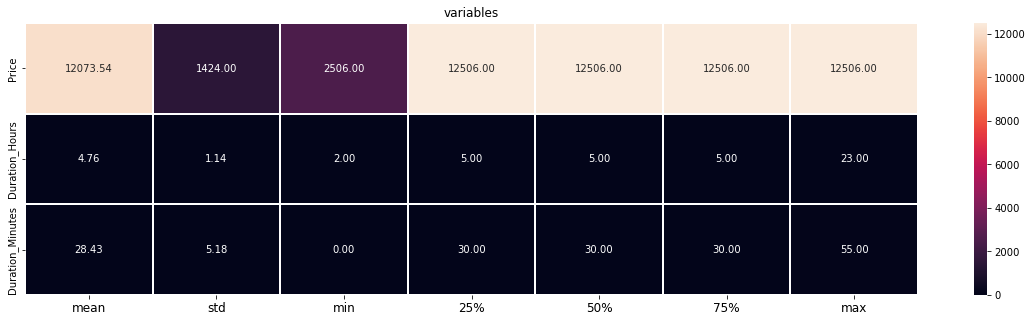

In [198]:
plt.figure(figsize=(20,5))
sns.heatmap(round(flight.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='.2f')
plt.xticks(fontsize=18)
plt.xticks(fontsize=12)
plt.title('variables')
plt.show()

### Data Visualization
#### Univariate Analysis
#### Using Countplot

IndiGo       483
Air India    361
Vistara      331
SpiceJet     155
Go First     100
Air Asia      70
Name: Airline, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Airline'>

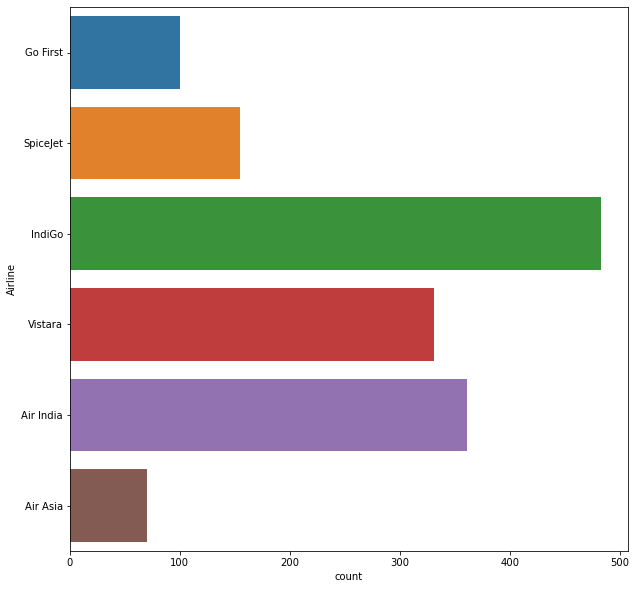

In [199]:
#Count Plot for "Airline_Name" column
print(flight["Airline"].value_counts())
plt.figure(figsize=(10,10))
sns.countplot(y= "Airline",data=flight)

Bangalore    597
Kolkata      301
Delhi        301
Mumbai       301
Name: Source, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Source'>

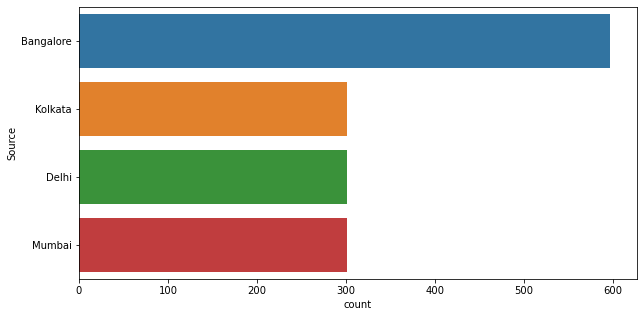

In [200]:
#Count Plot for "Source" column
print(flight["Source"].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(y= "Source",data=flight)

Mumbai       393
New Delhi    349
Chennai      257
Bangalore    251
Rajasthan    250
Name: Destination, dtype: int64


<AxesSubplot:xlabel='count', ylabel='Destination'>

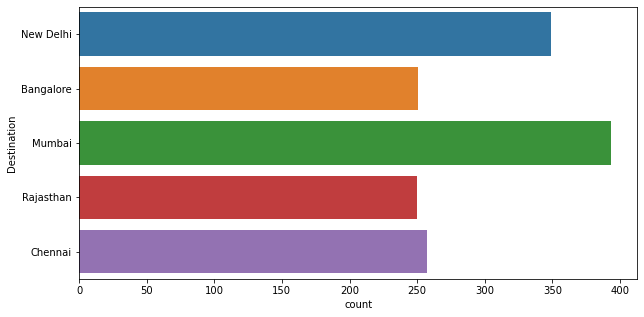

In [201]:
#Count Plot for "Destination" column
print(flight["Destination"].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(y="Destination",data=flight)

Non Stop    1500
Name: Total_Stops, dtype: int64


<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

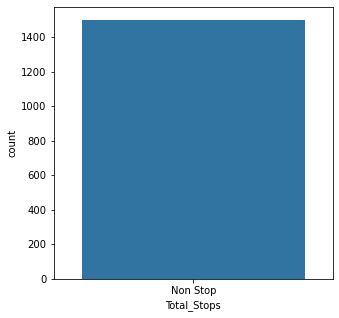

In [202]:
#Count Plot for "Total_Stops" column
print(flight["Total_Stops"].value_counts())
plt.figure(figsize=(5,5))
sns.countplot("Total_Stops",data=flight)

16:20    298
23:15     56
6:15      55
0:40      37
11:00     37
9:40      36
21:15     36
12:35     36
21:55     36
19:05     36
22:00     20
20:35     20
23:55     20
1:00      20
23:05     20
7:55      19
18:30     19
11:10     19
17:20     19
0:30      19
15:45     19
20:45     19
9:05      19
10:10     19
11:15     19
9:45      19
0:05      19
14:15     19
18:20     19
11:20     19
18:45     19
5:30      19
14:00     18
20:05     18
23:35     18
17:40     18
20:10     18
16:15     18
15:00     18
23:40     18
22:50     18
22:10     18
7:40      18
16:30     18
11:35     18
12:00     18
0:10      18
20:25     18
18:25     18
9:30      18
1:40      18
12:50     18
8:35      18
13:55     18
4:10      18
Name: Dep_Time, dtype: int64


<AxesSubplot:xlabel='Dep_Time', ylabel='count'>

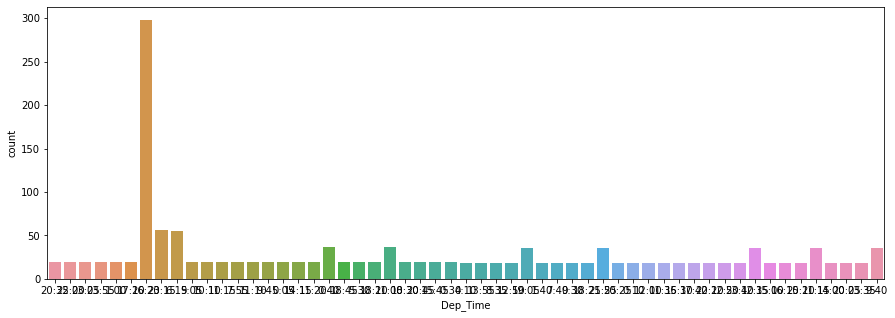

In [203]:
#countplot for "Dep_Hour" column
print(flight["Dep_Time"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(x="Dep_Time",data=flight)

30    1347
15     105
10      20
5       15
20       5
35       2
45       2
25       1
55       1
0        1
50       1
Name: Duration_Minutes, dtype: int64


<AxesSubplot:xlabel='Duration_Minutes', ylabel='count'>

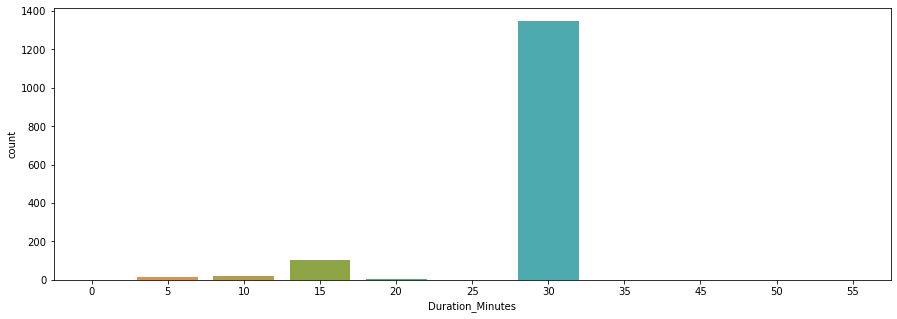

In [204]:
#countplot for "Arrival_Minute" column
print(flight["Duration_Minutes"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(x="Duration_Minutes",data=flight)

5     1348
2      143
12       2
8        1
15       1
16       1
23       1
13       1
6        1
9        1
Name: Duration_Hours, dtype: int64


<AxesSubplot:xlabel='Duration_Hours', ylabel='count'>

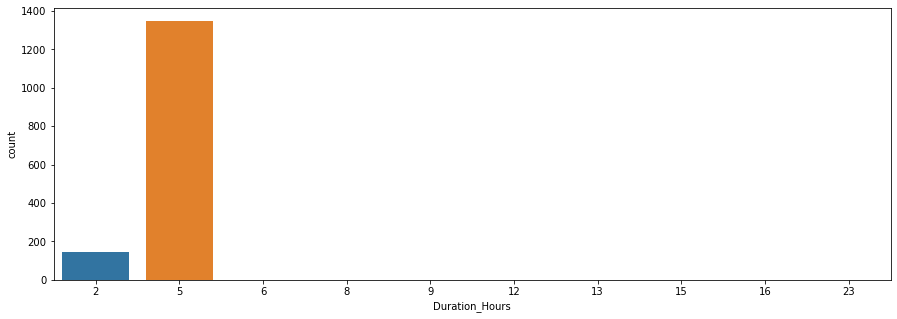

In [205]:
#countplot for "Duration_Hours" column
print(flight["Duration_Hours"].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(x="Duration_Hours",data=flight)

### Hisplot

12506    1345
8579       21
5955       19
5954       15
5950       10
10293       9
10229       8
9840        7
6092        7
9768        4
6165        3
10050       2
9293        2
10397       2
10503       2
10680       2
6827        2
8936        2
8947        2
11552       1
10338       1
10363       1
10364       1
10386       1
12337       1
10470       1
10520       1
11623       1
10545       1
11900       1
11625       1
11021       1
11330       1
10712       1
7897        1
10102       1
7835        1
8580        1
8652        1
9000        1
9146        1
9157        1
9210        1
9525        1
9646        1
9682        1
9734        1
9750        1
9830        1
9839        1
7698        1
9942        1
9978        1
10007       1
2506        1
Name: Price, dtype: int64


<AxesSubplot:xlabel='Price', ylabel='Count'>

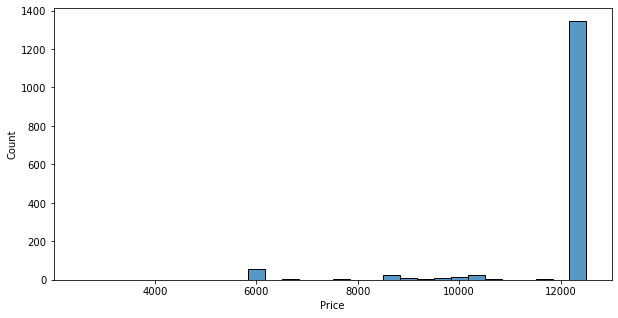

In [206]:
#HistPlot for "Price" column
print(flight["Price"].value_counts())
plt.figure(figsize=(10,5))
sns.histplot(x="Price",data=flight, bins=30)

### Bivariate Analysis
####Using Barplot

<AxesSubplot:xlabel='Price', ylabel='Airline'>

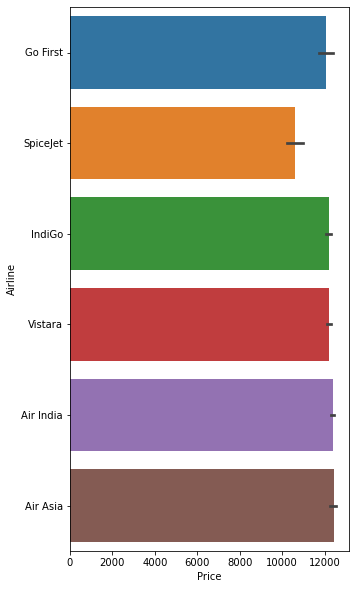

In [207]:
#BarPlot for comparision between "Airline" column and "Price" column
plt.figure(figsize=(5,10))
sns.barplot(y="Airline",data=flight, x='Price')

<AxesSubplot:xlabel='Source', ylabel='Price'>

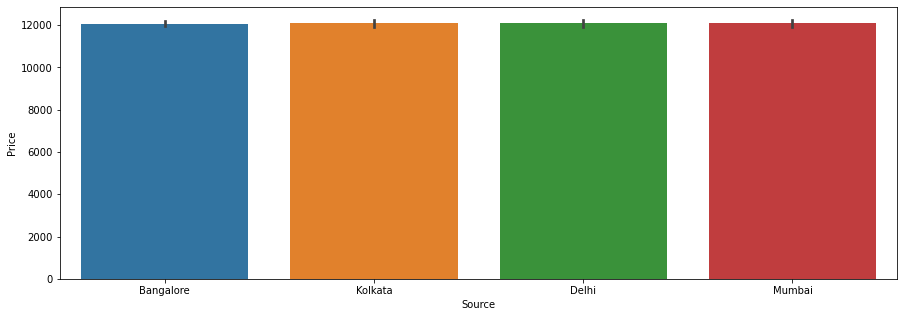

In [208]:
#BarPlot for comparision between "Source" column and "Price" column
plt.figure(figsize=(15,5))
sns.barplot(x="Source",data=flight, y='Price')

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

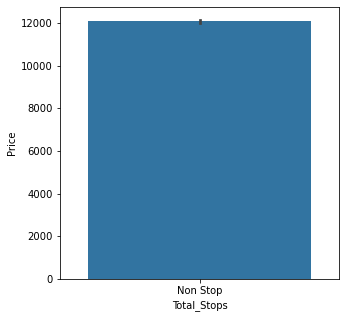

In [209]:
#BarPlot for comparision between "Total_Stops" column and "Price" column
plt.figure(figsize=(5,5))
sns.barplot(x="Total_Stops",data=flight, y='Price')

<AxesSubplot:xlabel='Dep_Time', ylabel='Price'>

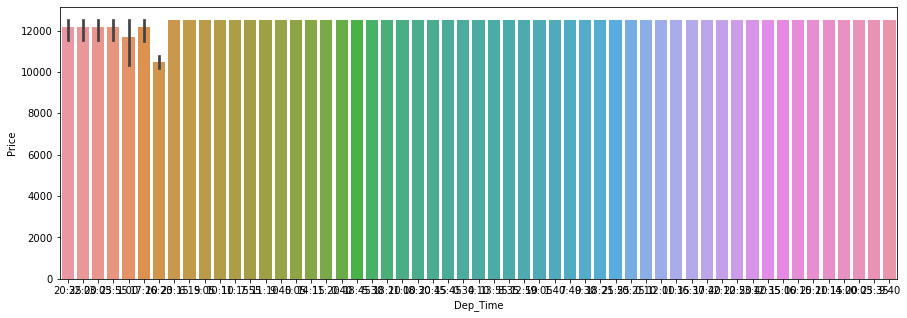

In [210]:
#BarPlot for comparision between "Arrival_Hour" column and "Price" column
plt.figure(figsize=(15,5))
sns.barplot(x="Dep_Time",data=flight, y='Price')

<AxesSubplot:xlabel='Duration_Hours', ylabel='Price'>

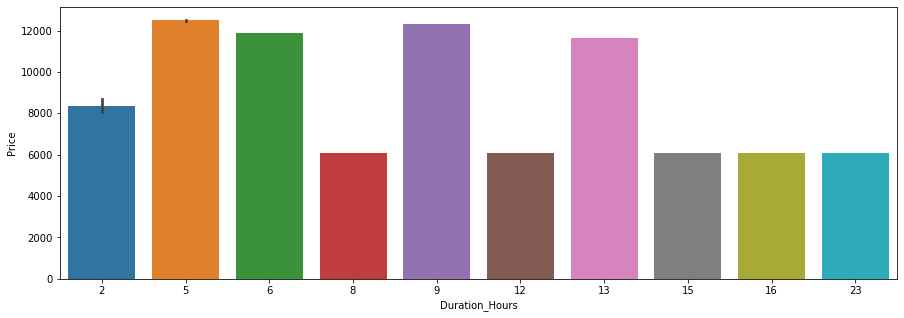

In [211]:
#BarPlot for comparision between "Duration_HoursDuration_Hours" column and "Price" column
plt.figure(figsize=(15,5))
sns.barplot(x="Duration_Hours",data=flight, y='Price')

<AxesSubplot:xlabel='Duration_Minutes', ylabel='Price'>

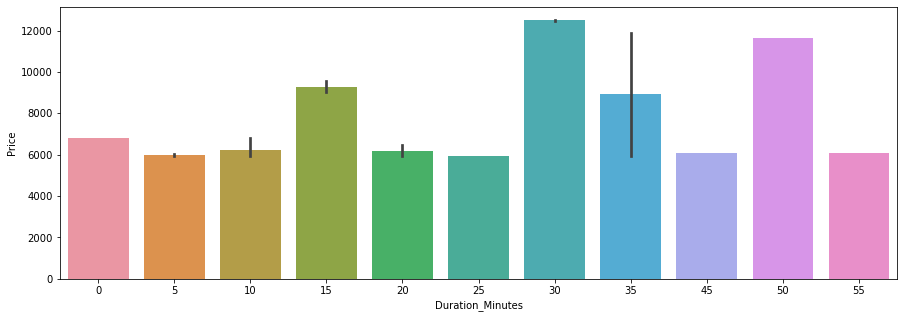

In [212]:
#BarPlot for comparision between "Duration_Minutes" column and "Price" column
plt.figure(figsize=(15,5))
sns.barplot(x="Duration_Minutes",data=flight, y='Price')

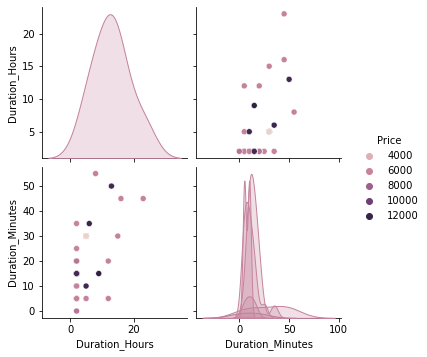

In [213]:
sns.pairplot(flight,hue="Price")


#### Label Encoding

In [214]:
enc = LabelEncoder()
for i in flight.columns:
    if flight[i].dtypes=="object":
        flight[i]=enc.fit_transform(flight[i].values.reshape(-1,1))

In [215]:
flight.dtypes

Airline             int32
Source              int32
Destination         int32
Dep_Time            int32
Total_Stops         int32
Price               int64
Duration_Hours      int64
Duration_Minutes    int64
dtype: object

In [216]:
flight.head()

,Airline,Source,Destination,Dep_Time,Total_Stops,Price,Duration_Hours,Duration_Minutes
0,2,0,3,33,0,5950,2,5
1,2,2,0,37,0,5950,2,10
2,2,1,2,40,0,5950,2,5
3,2,3,4,44,0,5950,2,10
4,4,0,1,28,0,5950,2,5


In [217]:
flight.corr()

,Airline,Source,Destination,Dep_Time,Total_Stops,Price,Duration_Hours,Duration_Minutes
Airline,1.000000,-0.005202,0.038710,-0.064128,NaN,-0.125638,-0.075799,-0.128079
Source,-0.005202,1.000000,0.039760,0.008264,NaN,0.005916,-0.004310,-0.003377
Destination,0.038710,0.039760,1.000000,-0.093876,NaN,-0.120898,-0.046521,-0.092176
Dep_Time,-0.064128,0.008264,-0.093876,1.000000,NaN,0.123500,0.090129,0.126710
Total_Stops,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,-0.125638,0.005916,-0.120898,0.123500,NaN,1.000000,0.515832,0.824094
Duration_Hours,-0.075799,-0.004310,-0.046521,0.090129,NaN,0.515832,1.000000,0.771873
Duration_Minutes,-0.128079,-0.003377,-0.092176,0.126710,NaN,0.824094,0.771873,1.000000


In [218]:
flight.corr()["Price"].sort_values()

Airline            -0.125638
Destination        -0.120898
Source              0.005916
Dep_Time            0.123500
Duration_Hours      0.515832
Duration_Minutes    0.824094
Price               1.000000
Total_Stops              NaN
Name: Price, dtype: float64

### Checking Correlation with HeatMap

<AxesSubplot:>

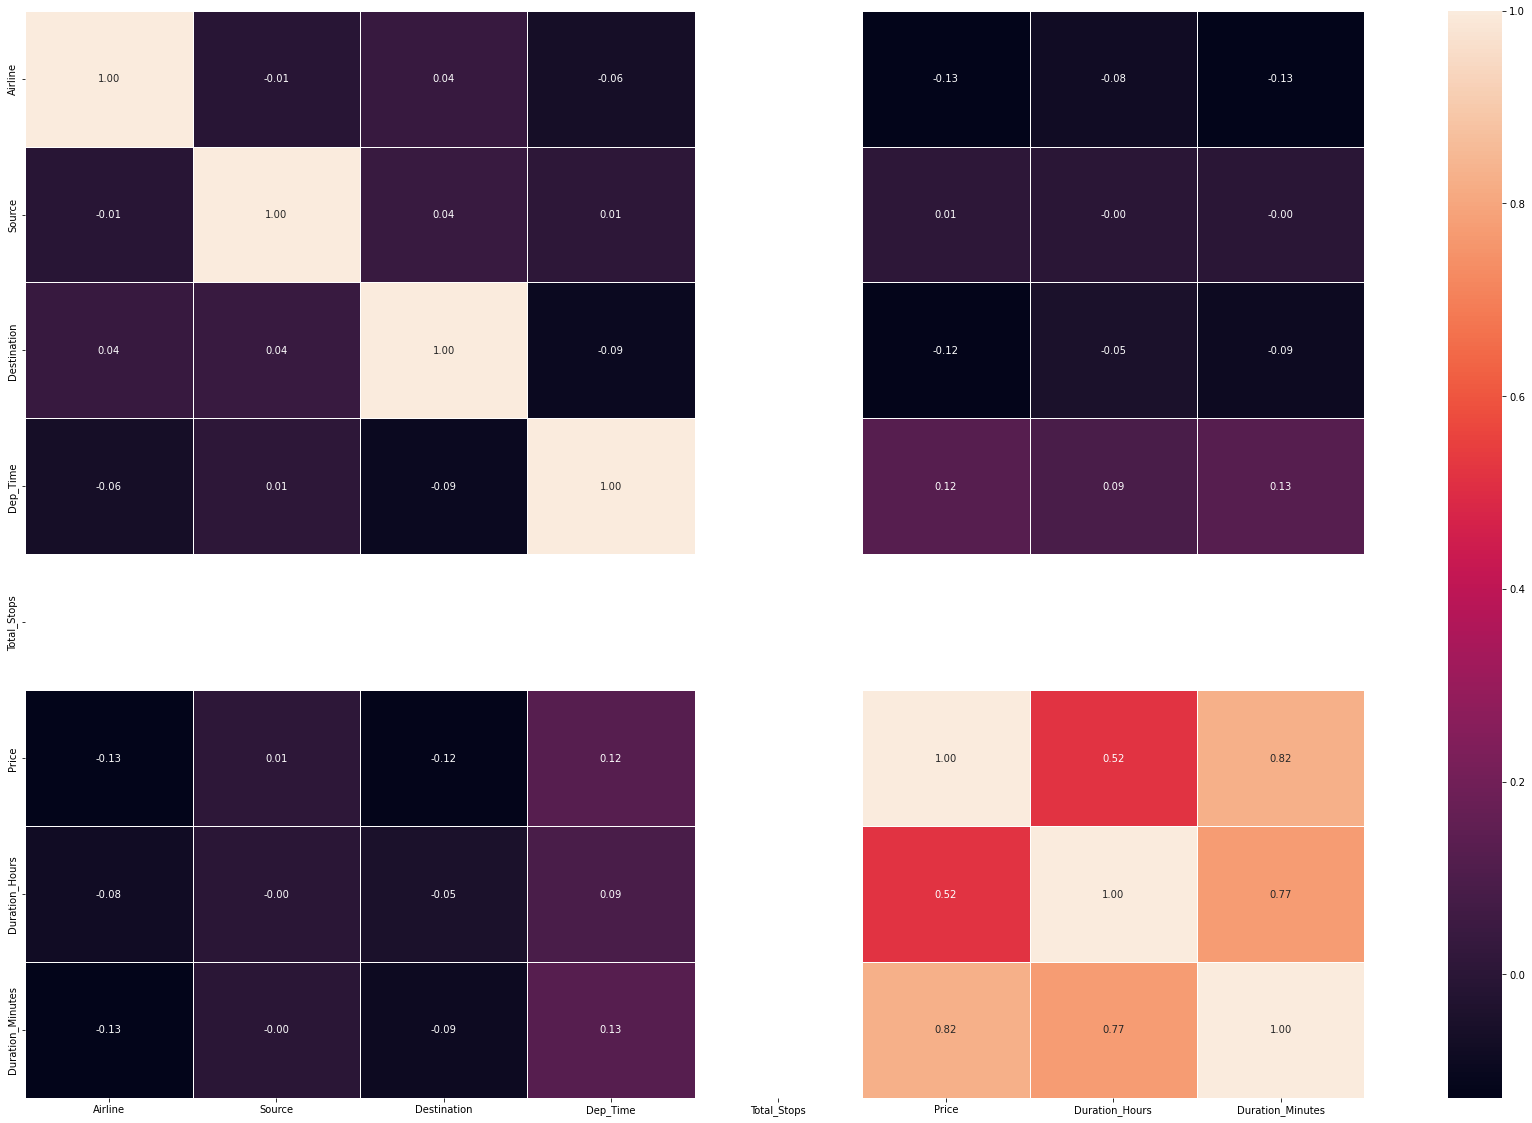

In [219]:
plt.figure(figsize=(30,20))
sns.heatmap(flight.corr(),annot=True,annot_kws= {"size": 10}, linewidth=0.5, linecolor='white', fmt='.2f')

### Cheking Correlation with Barplot

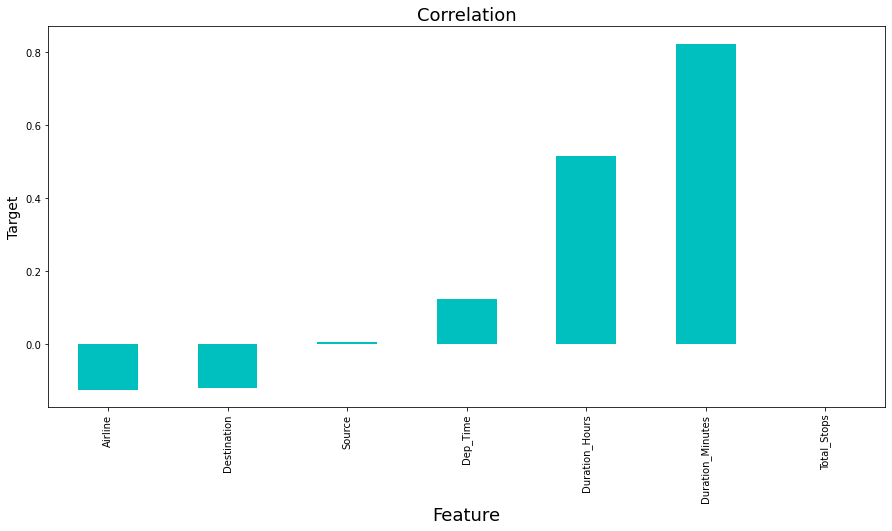

In [220]:
plt.figure(figsize=(15,7))
flight.corr()['Price'].sort_values(ascending=True).drop(['Price']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=18)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

### Checking Outliers

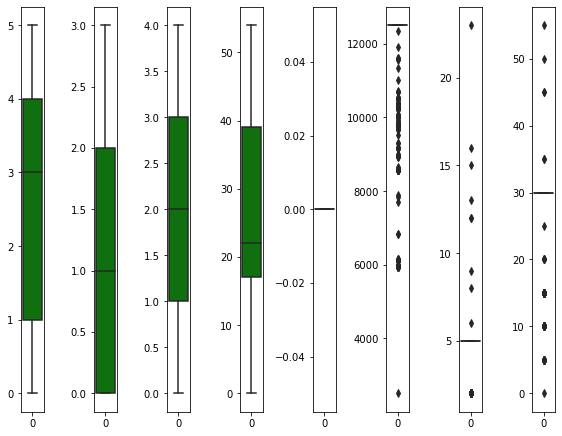

In [221]:
collist= flight.columns.values
ncol=14
nrows=7
plt.figure(figsize=(ncol,3*ncol))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data=flight[collist[i]],color='green',orient='v')
    plt.tight_layout()

### Checking skweness


In [222]:
flight.skew()

Airline            -0.091239
Source              0.358198
Destination        -0.112331
Dep_Time            0.188920
Total_Stops         0.000000
Price              -3.509232
Duration_Hours      3.193993
Duration_Minutes   -2.663794
dtype: float64

### Spliting data into Target and Features:


In [223]:
x=flight.drop("Price",axis=1)
y=flight["Price"]

In [224]:
x.columns

Index(['Airline', 'Source', 'Destination', 'Dep_Time', 'Total_Stops',
       'Duration_Hours', 'Duration_Minutes'],
      dtype='object')

In [225]:
x.head()

,Airline,Source,Destination,Dep_Time,Total_Stops,Duration_Hours,Duration_Minutes
0,2,0,3,33,0,2,5
1,2,2,0,37,0,2,10
2,2,1,2,40,0,2,5
3,2,3,4,44,0,2,10
4,4,0,1,28,0,2,5


In [226]:
y.head()

0    5950
1    5950
2    5950
3    5950
4    5950
Name: Price, dtype: int64

In [227]:
x.shape, y.shape


((1500, 7), (1500,))

### Scaling data using Standard Scaler


In [228]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

In [229]:
x.head()

,Airline,Source,Destination,Dep_Time,Total_Stops,Duration_Hours,Duration_Minutes
0,-0.551280,-1.032529,0.713350,0.461117,0.0,-2.430924,-4.522701
1,-0.551280,0.682635,-1.563300,0.728871,0.0,-2.430924,-3.557687
2,-0.551280,-0.174947,-0.045533,0.929687,0.0,-2.430924,-4.522701
3,-0.551280,1.540217,1.472234,1.197441,0.0,-2.430924,-3.557687
4,0.735755,-1.032529,-0.804417,0.126425,0.0,-2.430924,-4.522701


### Checking for Multicolinearity


#### VIF (Variance Inflation factor)


In [230]:
vif = pd.DataFrame()
vif['VIF values']= [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
vif

,VIF values,Features
0,1.020948,Airline
1,1.001784,Source
2,1.019256,Destination
3,1.025829,Dep_Time
4,NaN,Total_Stops
5,2.481004,Duration_Hours
6,2.537751,Duration_Minutes


### Variance Threshold Method


In [231]:
var_threshold = VarianceThreshold(threshold=0)
var_threshold.fit(x)

VarianceThreshold(threshold=0)

In [232]:
var_threshold.get_support()

array([ True,  True,  True,  True, False,  True,  True])

In [233]:
x.columns[var_threshold.get_support()]

Index(['Airline', 'Source', 'Destination', 'Dep_Time', 'Duration_Hours',
       'Duration_Minutes'],
      dtype='object')

In [234]:
# taking  out  all the  constant  columns 
cons_columns = [column for column in x.columns
               if column not in x.columns[var_threshold.get_support()]]
print(len(cons_columns))

1


### Selecting Kbest Features

In [235]:
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [236]:
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(40,'Score'))

            Feature       Score
6  Duration_Minutes  246.239769
5    Duration_Hours  226.876543
0           Airline    2.526158
2       Destination    1.381302
1            Source    0.835614
3          Dep_Time    0.660808


In [237]:
#checking again 
bestfeat = SelectKBest(score_func = f_classif, k = 'all')
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [238]:
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScores = pd.concat([dfcolumns,dfscores],axis = 1)
featureScores.columns = ['Feature', 'Score']
print(featureScores.nlargest(40,'Score'))

            Feature       Score
6  Duration_Minutes  246.239769
5    Duration_Hours  226.876543
0           Airline    2.526158
2       Destination    1.381302
1            Source    0.835614
3          Dep_Time    0.660808


#### Finding the best random state among all the models
On the basis of target column, we will understand this by Regression Problem



In [239]:
maxAcc = 0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .25, random_state = i)
    modDTR =  DecisionTreeRegressor()
    modDTR.fit(x_train,y_train)
    pred = modDTR.predict(x_test)
    acc  = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print(f"Best Accuracy is: {maxAcc} on random_state: {maxRS}")

Best Accuracy is: 0.9779121644973628 on random_state: 19


### Creating train-test-split


In [240]:
# creating new train test split using the random state.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .20, random_state = maxRS)

#### 1. Linear Regression


In [241]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))
print('Mean abs error:',mean_absolute_error(y_test, predLR))
print('Mean squared error:',mean_squared_error(y_test, predLR))

R2_score: 0.8525592198990548
Mean abs error: 191.3900075374565
Mean squared error: 227115.13281580622


#### Checking the performance of the model by graph

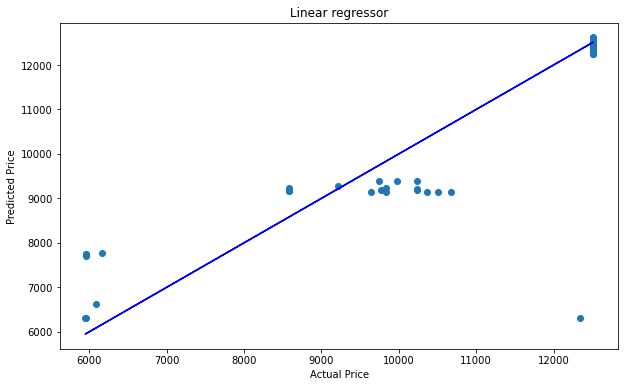

In [242]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predLR,cmap='set1')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear regressor")
plt.show()

#### 2. Random Forest Regression Model


In [243]:
# Checking R2 score for Random Forest Regressor
RFR=RandomForestRegressor(n_estimators=600, random_state=maxRS)
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR))
print('Mean abs error:',mean_absolute_error(y_test, predRFR))
print('Mean squared error:',mean_squared_error(y_test, predRFR))

R2_Score: 0.973397495454459
Mean abs error: 39.928206575953496
Mean squared error: 40978.020795583834


#### Checking the performance of the model by graph


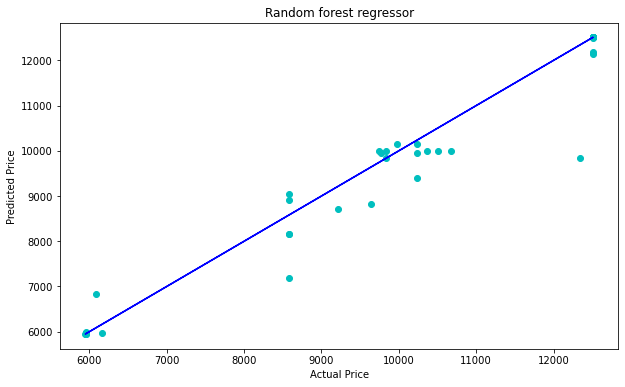

In [244]:
#Verifying the performance of the model by graph
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predRFR,color='c')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random forest regressor")
plt.show()

#### 3. KNN Regressor


In [245]:
# Checking R2 score for KNN regressor
knn=KNeighborsRegressor(n_neighbors=9 )
knn.fit(x_train,y_train)

#prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('Mean abs error:',mean_absolute_error(y_test, predknn))
print('Mean squared error:',mean_squared_error(y_test, predknn))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,predknn)))

R2_Score: 0.886363871968941
Mean abs error: 101.21555555555555
Mean squared error: 175043.05316872426
Root Mean Squared Error:  418.3814684814855


#### Checking the performance of the model by graph


Text(0.5, 1.0, 'K-nearest neighbors  regressor')

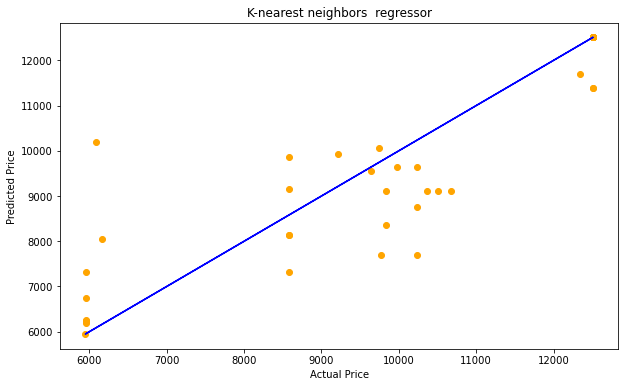

In [246]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predknn,color='orange')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("K-nearest neighbors  regressor")

#### 4. Gradient boosting Regressor


In [247]:
# Checking R2 score for GBR
Gb= GradientBoostingRegressor(n_estimators=400,  random_state=maxRS, learning_rate=0.1, max_depth=3)
Gb.fit(x_train,y_train)

#prediction
predGb=Gb.predict(x_test)
print('R2_Score:',r2_score(y_test,predGb))
print('Mean abs error:',mean_absolute_error(y_test, predGb))
print('Mean squared error:',mean_squared_error(y_test, predGb))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,predGb)))

R2_Score: 0.9720885588333861
Mean abs error: 53.9229114282877
Mean squared error: 42994.28328645586
Root Mean Squared Error:  207.35062885473934


#### Checking the performance of the model by graph


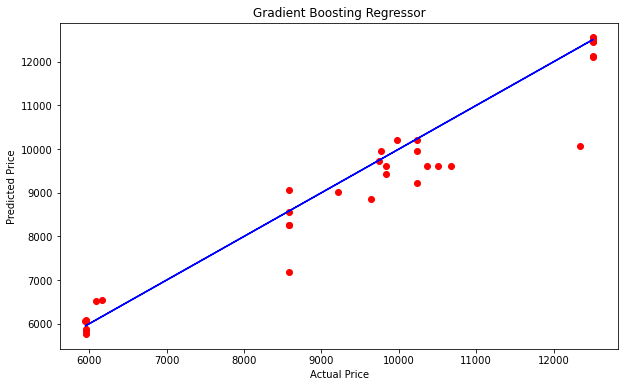

In [248]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predGb,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Gradient Boosting Regressor")
plt.show()

#### 5. Decision Tree Regressor


In [249]:
# Checking R2 score for GBR
DTR= DecisionTreeRegressor()
DTR.fit(x_train,y_train)

#prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,predDTR))
print('Mean abs error:',mean_absolute_error(y_test, predDTR))
print('Mean squared error:',mean_squared_error(y_test, predDTR))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,predDTR)))

R2_Score: 0.981737485400094
Mean abs error: 32.118796296296296
Mean squared error: 28131.24988940329
Root Mean Squared Error:  167.72373084749603


#### Checking the performance of the model by graph


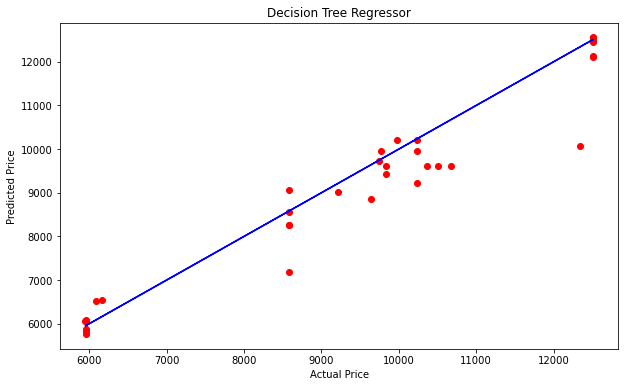

In [250]:
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=predGb,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Decision Tree Regressor")
plt.show()

### Cross Validation Score for all the model


In [251]:
#CV Score for Linear Regression
print('CV score for Linear Regression: ',cross_val_score(LR,x,y,cv=5).mean())

#CV Score for Random Forest Regression
print('CV score for Random forest Regression: ',cross_val_score(RFR,x,y,cv=5).mean())

#CV Score for KNN Regression
print('CV score for KNN Regression: ',cross_val_score(knn,x,y,cv=5).mean())

#CV Score for Gradient Boosting Regression
print('CV score for Gradient Boosting Regression: ',cross_val_score(Gb,x,y,cv=5).mean())

#CV Score for Decision Tree Regression
print('CV score for Decision Tree Regression: ',cross_val_score(DTR,x,y,cv=5).mean())

CV score for Linear Regression:  -0.1476413871776014
CV score for Random forest Regression:  0.053167979923595565
CV score for KNN Regression:  0.05315624100672674
CV score for Gradient Boosting Regression:  -0.14704886078642768
CV score for Decision Tree Regression:  0.45315624100672663


### Hyper Parameter Tuning


In [252]:
parameter = {'n_estimators':[100,200,300,400],
             'learning_rate':[0.1,0.01,0.001,1],
             'subsample': [0.1,0.2,0.3,0.5,1],
             'max_depth':[1,2,3,4],
             'alpha':[0.1,0.01,0.001,1]}

In [253]:
CV_GBR = GridSearchCV(GradientBoostingRegressor(),parameter,cv=6,n_jobs = 3,verbose = 2)


In [254]:
CV_GBR.fit(x_train,y_train)

Fitting 6 folds for each of 1280 candidates, totalling 7680 fits


GridSearchCV(cv=6, estimator=GradientBoostingRegressor(), n_jobs=3,
             param_grid={'alpha': [0.1, 0.01, 0.001, 1],
                         'learning_rate': [0.1, 0.01, 0.001, 1],
                         'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 200, 300, 400],
                         'subsample': [0.1, 0.2, 0.3, 0.5, 1]},
             verbose=2)

In [255]:
CV_GBR.best_params_

{'alpha': 0.01,
 'learning_rate': 0.01,
 'max_depth': 3,
 'n_estimators': 400,
 'subsample': 0.3}

#### Creating Regressor Model with Gradient Boosting Regressor

In [256]:
GBR = GradientBoostingRegressor(n_estimators=400, alpha=0.001,learning_rate= 0.1, max_depth= 4, subsample = 0.5)
GBR.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.001, max_depth=4, n_estimators=400,
                          subsample=0.5)

In [257]:
#prediction
GBRpred = GBR.predict(x_test)
#R2 score
acc = r2_score(y_test,GBRpred)
print(acc*100)

96.45924392037031


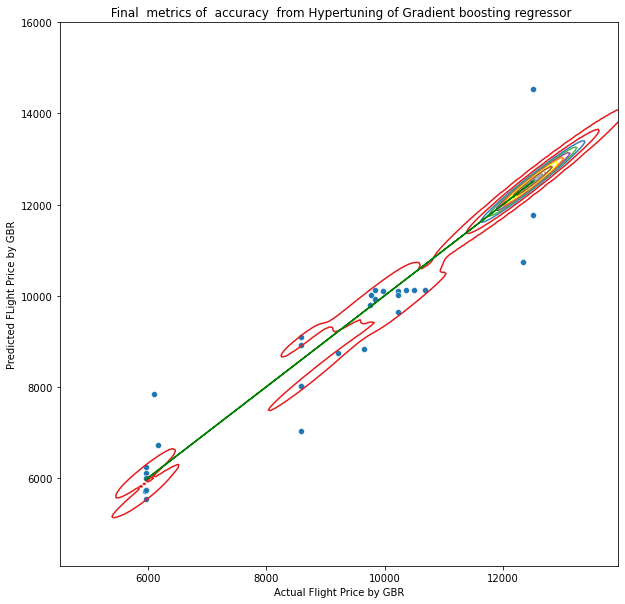

In [258]:
#Verifying the final  performance of the model by graph
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test,y=GBRpred,palette='Set2')
sns.kdeplot(x=y_test,y=GBRpred, cmap='Set1')
plt.plot(y_test,y_test,color='g')
#Verifying the performance of the model by graph
plt.xlabel("Actual Flight Price by GBR")
plt.ylabel("Predicted FLight Price by GBR")
plt.title(" Final  metrics of  accuracy  from Hypertuning of Gradient boosting regressor")
plt.show()

### The Random Forest regressor with GridsearchCV


In [259]:
parameter = {'n_estimators':[30,60,80],'max_depth': [10,20,40],
             'min_samples_leaf':[5,10,20],'min_samples_split':[5,10],
             'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}

In [260]:
GCV = GridSearchCV(RandomForestRegressor(),parameter,cv=5,n_jobs = -1,verbose = 1)

In [261]:
GCV.fit(x_train,y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10],
                         'n_estimators': [30, 60, 80]},
             verbose=1)

In [262]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 80}

### Creating Regressor Model with Random Forest Regressor


In [263]:
RFR = RandomForestRegressor(random_state=50, max_features='auto', n_estimators= 200, max_depth=6, criterion='mse')
RFR.fit(x_train, y_train)

RandomForestRegressor(criterion='mse', max_depth=6, max_features='auto',
                      n_estimators=200, random_state=50)

In [264]:
#prediction
RFRpred = RFR.predict(x_test)
#R2 score
acc = r2_score(y_test,RFRpred)
print(acc*100)

96.1050503129933


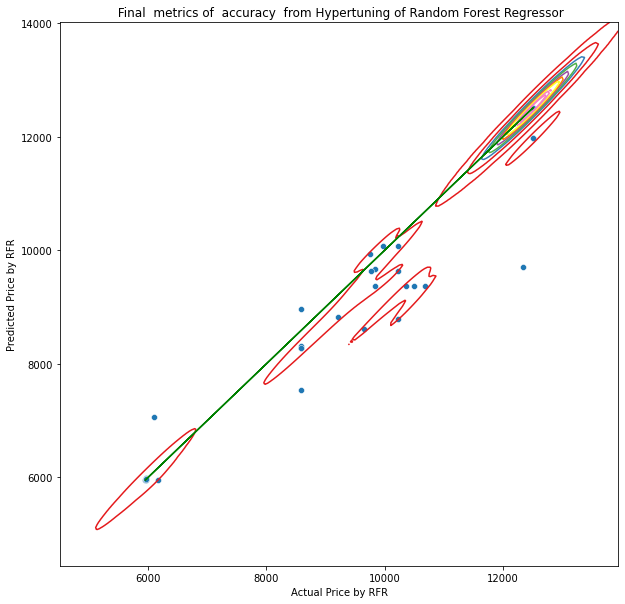

In [265]:
#Verifying the final  performance of the model by graph
plt.figure(figsize=(10,10))
sns.scatterplot(x=y_test,y=RFRpred,palette='Set2')
sns.kdeplot(x=y_test,y=RFRpred, cmap='Set1')
plt.plot(y_test,y_test,color='g')
#Verifying the performance of the model by graph
plt.xlabel("Actual Price by RFR")
plt.ylabel("Predicted Price by RFR")
plt.title(" Final  metrics of  accuracy  from Hypertuning of Random Forest Regressor")
plt.show()


### Saving The Predictive Model


In [266]:
#saving the model at local file system
filename='flight_price_prediction.pickle'
pickle.dump(CV_GBR,open(filename,'wb'))
#prediction using the saved model
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(x_test)

array([12496.98526587,  9731.14059416, 12480.86982193, 12485.03109331,
       12496.99114206, 12476.62220721, 12495.33847687,  8085.36177757,
       12485.03109331, 12499.93758076, 12496.24802507, 12493.22295998,
       12493.22295998, 12497.76685031, 12498.19607534,  9254.35183468,
        5978.33520635, 12496.24802507, 12499.15599633, 12476.62220721,
       12479.30501329, 12499.32922116, 12486.19449868, 12479.30501329,
       12493.22295998, 12500.07781001, 12494.43964564, 12494.00454441,
       12494.00454441, 12478.18701585, 12498.55351291, 12486.19449868,
       12493.22883617, 12498.97765978,  6557.14606876, 12494.43376945,
       12496.99114206, 12470.63037456, 12494.00454441, 12494.43964564,
       12486.59590195, 12500.54003063, 12498.19607534, 12493.22295998,
       12462.49976874, 12498.97765978, 12485.03109331, 12493.22883617,
        9336.29697033, 12499.75844619, 12470.50725157, 12499.29622557,
       12493.22883617, 12480.86982193, 12480.86982193, 12499.29622557,
      

In [267]:
a = np.array(y_test)
predict = np.array(loaded_model.predict(x_test))
flight_price_prediction = pd.DataFrame({"Original":a,"Predicted":predict},index= range(len(a)))
flight_price_prediction

,Original,Predicted
0,12506,12496.985266
1,10229,9731.140594
2,12506,12480.869822
3,12506,12485.031093
4,12506,12496.991142
...,...,...
295,12506,12496.889380
296,12506,12475.186219
297,12506,12498.196075
298,12506,12479.305013


### Let's plot and visualize


Text(0.5, 1.0, 'Original vs predicted  graph')

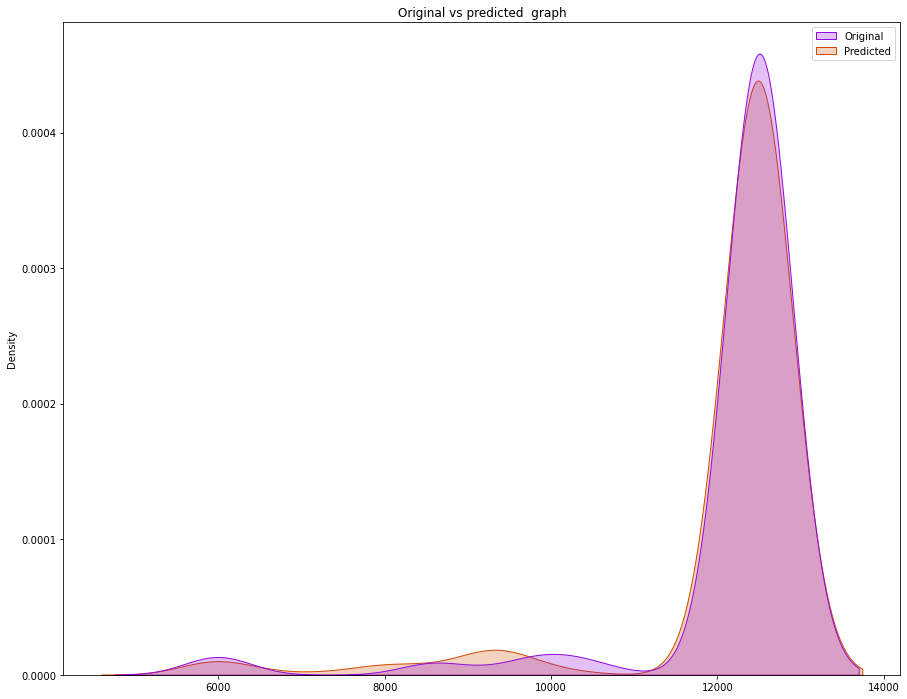

In [268]:
plt.figure(figsize=(15,12))
sns.kdeplot(data=flight_price_prediction, palette='gnuplot',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')

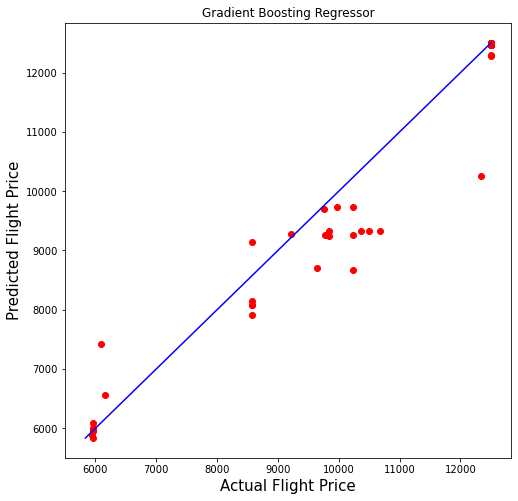

In [269]:
plt.figure(figsize=(8,8))
plt.scatter(y_test,predict,c='r')
plt1 = max(max(predict),max(y_test))
plt2 = min(min(predict),min(y_test))
plt.plot([plt1,plt2],[plt1,plt2],'b-')
plt.xlabel('Actual Flight Price',fontsize=15)
plt.ylabel('Predicted Flight Price',fontsize=15)
plt.title("Gradient Boosting Regressor")
plt.show()

### Saving the model in CSV format


In [270]:
model =flight_price_prediction.to_csv('flight_price_prediction.csv')
model